In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
import sympy as sp
from IPython.display import display, Math

from uncertainties import ufloat
from uncertainties.umath import *

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

# MESSUNSICHERHEITSANALYSE
Labor Wärmetechnik (LV 307.027 - SS 2023)

Es werden zwei Fälle hinsichtlich ihrer Messunsicherheit verglichen. 
<br>
In beiden Fällen ist die berechnete Größe $\dot{Q}$ gleich groß.
<br>
Durch die unterschiedlichen Einflussfaktoren (gemessene Eingangsvariablen) kommt es jedoch zu unterschiedlichen Messunsicherheiten!

$\dot{Q} = \dot{Q_1} = \dot{Q_2} = \dot{m} \cdot c_{p} \cdot (t_{ein} - t_{aus})$

Fall 1:
<br>
$\dot{m}$ = 300 kg/h, $\Delta T = t_{ein} - t_{aus}$ = 50 - 40 = 10 K, $c_{p}$ = 4,181 kJ/(kg $\cdot$ K)

Fall 2:
<br>
$\dot{m}$ = 1500 kg/h, $\Delta T = t_{ein} - t_{aus}$ = 46 - 44 = 2 K, $c_{p}$ = 4,181 kJ/(kg $\cdot$ K)

Variablen:
<br>
Massenstrom $\dot{m}$ in kg/h 
<br>
Eintrittstemperatur $t_{ein}$ in °C
<br>
Austrittstemperatur $t_{aus}$ in °C
<br>
spezifische Wärmekapazität von Wasser $c_{p}$ in J/(kg $\cdot$ K)
<br>
<br>
Modellgleichung:
<br>
$\dot{Q} = \dot{m} \cdot c_{p} \cdot (t_{ein} - t_{aus})$ 
<br>
<br>
Anmerkung: 
<br>
$\dot{Q} = |\dot{Q_1}| = |\dot{Q_2}|$

## Fall 1:

Größen für Fall 1

In [2]:
t_ein_1 = 50 #[°C]
t_aus_1 = 40 #[°C]
# m_dot_1 = 300 [kg/h]
m_dot_1 = 300/3600 #[kg/s]
c_p_1 = 4.181*10**3 #[J/(kg*K)]

### systematische Messunsicherheit $u_{sys}$
z.B. aus Herstellerangabe $\longrightarrow$ Fehlergrenze $\pm$a (symmetrische)

Fehlergrenze Temperatursensor: $\pm$0,15 K
<br>
Fehlergrenze Massenstrommessgerät: $\pm$4 kg/h

Annahme: Rechteckverteilung für systematische Messabweichungen
<br>
$u_{sys} = \dfrac{a}{\sqrt{3}}$

In [3]:
a_T_1 = 0.15 #[K]
a_m_dot_1 = 4 #[kg/h]

u_sys_T_1 = a_T_1 / (math.sqrt(3)) #[K]
u_sys_m_dot_1 = a_m_dot_1 / (math.sqrt(3)) #[kg/h]

print('u_sys_T_1 =', round(u_sys_T_1, 3), '[K]')
print('u_sys_m_dot_1 =', round(u_sys_m_dot_1, 2), '[kg/h]')

u_sys_T_1 = 0.087 [K]
u_sys_m_dot_1 = 2.31 [kg/h]


### zufällige Messunsicherheit $u_{zuf}$
z.B. aus Sensorrauschen $\longrightarrow$ Standardabweichung einer Messreihe 

$u_{zuf} = \sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^{n}(x_{i}-x_{0})^2}$

In [4]:
u_zuf_T_1 = 0.01 #[K]
u_zuf_m_dot_1 = 0 #[kg/h]

### Kombination zufälliger und systematischer Messunsicherheiten
$u(y) = \sqrt{(u_{sys})^2 + (u_{zuf})^2}$

Temperatur-Messunsicherheit:
<br>
$u(T) = \sqrt{u_{sys}(T)^2 + u_{zuf}(T)^2}$
<br>
<br>
Massenstrom-Messunsicherheit:
<br>
$u(\dot{m}) = \sqrt{u_{sys}(\dot{m})^2 + u_{zuf}(\dot{m})^2}$
<br>
<br>
spezifische Wärmekapazität:
<br>
Einfluss wurde vernachlässigt

In [5]:
u_T_1 = math.sqrt((u_sys_T_1)**2 + (u_zuf_T_1)**2)
u_m_dot_1 = math.sqrt((u_sys_m_dot_1)**2 + (u_zuf_m_dot_1)**2)

print('u_T_1 = ±', round(u_T_1, 3), '[K]')
print('u_m_dot_1 = ±', round(u_m_dot_1, 2), '[kg/h]')

u_T_1 = ± 0.087 [K]
u_m_dot_1 = ± 2.31 [kg/h]


### Größen ± Messunsicherheit

Messunsicherheiten $\longrightarrow$ uncertainties package $\longrightarrow$ https://pythonhosted.org/uncertainties/

In [6]:
t_ein_err_1 = ufloat(t_ein_1, u_T_1)
t_aus_err_1 = ufloat(t_aus_1, u_T_1)

m_dot_err_1 = ufloat(m_dot_1, u_m_dot_1/3600)

print('t_ein_err_1 =', t_ein_err_1, '[°C]')
print('t_aus_err_1 =', t_aus_err_1, '[°C]')

print('m_dot_err_1 =', m_dot_err_1, '[kg/s]')

t_ein_err_1 = 50.00+/-0.09 [°C]
t_aus_err_1 = 40.00+/-0.09 [°C]
m_dot_err_1 = 0.0833+/-0.0006 [kg/s]


### Fortpflanzung der Messunsicherheiten (Gauß'sche Fehlerfortpflanzung)

$u(y) = \sqrt{\sum_{i=1}^{n}(\frac{\partial f}{\partial x_i})^2 \cdot u(x_i)^2}$

Anmerkung:
<br>
Die Messwerte $x_i$ müssen voneinander unabhängig (unkorreliert) sein.
<br>
Annahme: systematischen Anteile sind normalverteilt!

Modellgleichung: $\dot{Q} = \dot{m} \cdot c_{p} \cdot (t_{ein} - t_{aus})$ $\longrightarrow$ Partielle Ableitungen $\longrightarrow$ Berechnung der Messunsicherheit

In [7]:
# nicht notwendig (nur eine Demonstration der Ableitungen)

# Definiere die Variablen
# c_p = konstant
m_dot, c_p, t_ein, t_aus = sp.symbols('m_dot c_p t_ein t_aus')

# Definiere die Funktion
Q_dot = m_dot * c_p * (t_aus - t_ein)

# Berechne die partiellen Ableitungen
partial_m_dot = sp.diff(Q_dot, m_dot)
partial_t_ein = sp.diff(Q_dot, t_ein)
partial_t_aus = sp.diff(Q_dot, t_aus)

# Gib die Ergebnisse aus
print('Modellgleichung:')
display(Math(r'\dot{Q} = \dot{m} \cdot c_{p} \cdot (t_{aus} - t_{ein})' ))
print('Partielle Ableitungen:')
display(Math(r'\frac{\partial \dot{Q}}{\partial \dot{m}} =' + sp.latex(partial_m_dot)))
display(Math(r'\frac{\partial \dot{Q}}{\partial t_{ein}} =' + sp.latex(partial_t_ein)))
display(Math(r'\frac{\partial \dot{Q}}{\partial t_{aus}} =' + sp.latex(partial_t_aus)))

Modellgleichung:


<IPython.core.display.Math object>

Partielle Ableitungen:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
Q_dot_err_1 = m_dot_err_1 * c_p_1 * (t_ein_err_1 - t_aus_err_1)
#print('Q_dot_err_1 =', Q_dot_err_1, '[W]')
#print('Q_dot_err_1 = {:.2u}'.format(Q_dot_err_1), '[W] = {:.2u}'.format(Q_dot_err_1*10**(-3)), '[kW]')
print('\033[1m' + 'Q_dot_err_1 = {:.2f}'.format(Q_dot_err_1), '[W] =', 
      bcolors.UNDERLINE + '{:.2f}'.format(Q_dot_err_1*10**(-3)), '[kW]' + bcolors.ENDC)

Q_dot_err_1 = 3484.17+/-50.64 [W] = 3.48+/-0.05 [kW]


## Fall 2:

Größen für Fall 1

In [9]:
t_ein_2 = 46 #[°C]
t_aus_2 = 44 #[°C]
# m_dot_2 = 1500 #[kg/h]
m_dot_2 = 1500/3600 #[kg/s]
c_p_2 = c_p_1

### systematische Messunsicherheit $u_{sys}$

Fehlergrenzen gleich wie in Fall 1 $\longrightarrow$ systematische Messunsicherheiten bleiben gleich

In [10]:
a_T_2 = a_T_1
a_m_dot_2 = a_m_dot_1

u_sys_T_2 = a_T_2 / (math.sqrt(3)) #[K]
u_sys_m_dot_2 = a_m_dot_2 / (math.sqrt(3)) #[kg/h]

print('u_sys_T_2 =', round(u_sys_T_2, 3), '[K]')
print('u_sys_m_dot_2 =', round(u_sys_m_dot_2, 2), '[kg/h]')

u_sys_T_2 = 0.087 [K]
u_sys_m_dot_2 = 2.31 [kg/h]


### zufällige Messunsicherheit $u_{zuf}$

zufällige Messunsicherheit gleich wie in Fall 1

In [11]:
u_zuf_T_2 = u_zuf_T_1
u_zuf_m_dot_2 = u_zuf_m_dot_1

print('u_zuf_T_2 = u_zuf_T_1 =', u_zuf_T_2, '[K]')
print('u_zuf_m_dot_2 = u_zuf_m_dot_1 =', u_zuf_m_dot_2, '[kg/h]')

u_zuf_T_2 = u_zuf_T_1 = 0.01 [K]
u_zuf_m_dot_2 = u_zuf_m_dot_1 = 0 [kg/h]


### Kombination zufälliger und systematischer Messunsicherheiten

systematische und zufällige Messunsicherheiten gleich wie in Fall 1 $\longrightarrow$ Kombination der Messunsicherheiten gleich wie in Fall 1

In [12]:
u_T_2 = math.sqrt((u_sys_T_2)**2 + (u_zuf_T_2)**2)
u_m_dot_2 = math.sqrt((u_sys_m_dot_2)**2 + (u_zuf_m_dot_2)**2)

print('u_T_2 = u_T_1 = ±', round(u_T_2, 3), '[K]')
print('u_m_dot_2 = u_m_dot_1 = ±', round(u_m_dot_2, 2), '[kg/h]')

u_T_2 = u_T_1 = ± 0.087 [K]
u_m_dot_2 = u_m_dot_1 = ± 2.31 [kg/h]


### Größen ± Messunsicherheit

In [13]:
t_ein_err_2 = ufloat(t_ein_2, u_T_2)
t_aus_err_2 = ufloat(t_aus_2, u_T_2)

m_dot_err_2 = ufloat(m_dot_2, u_m_dot_2/3600)

print('t_ein_err_2 =', t_ein_err_2, '[°C]')
print('t_aus_err_2 =', t_aus_err_2, '[°C]')

print('m_dot_err_2 =', m_dot_err_2, '[kg/s]')

t_ein_err_2 = 46.00+/-0.09 [°C]
t_aus_err_2 = 44.00+/-0.09 [°C]
m_dot_err_2 = 0.4167+/-0.0006 [kg/s]


### Fortpflanzung der Messunsicherheiten (Gauß'sche Fehlerfortpflanzung)

In [14]:
Q_dot_err_2 = m_dot_err_2 * c_p_2 * (t_ein_err_2 - t_aus_err_2)
#print('Q_dot_err_2 =', Q_dot_err_2, '[W]')
#print('Q_dot_err_2 = {:.2u}'.format(Q_dot_err_2), '[W] = {:.2u}'.format(Q_dot_err_2*10**(-3)), '[kW]')
print('\033[1m' + 'Q_dot_err_1 = {:.2f}'.format(Q_dot_err_2), '[W] =', 
      bcolors.UNDERLINE + '{:.2f}'.format(Q_dot_err_2*10**(-3)), '[kW]' + bcolors.ENDC)

Q_dot_err_1 = 3484.17+/-214.85 [W] = 3.48+/-0.21 [kW]


# Vergleich von Fall 1 und Fall 2

In [15]:
Q_dot = m_dot_2 * c_p_2 * (t_ein_2 - t_aus_2) # = m_dot_1 * c_p_1 * (t_ein_1 - t_aus_1)

Fall_1 = Q_dot_err_1*10**(-3)
Fall_2 = Q_dot_err_2*10**(-3)

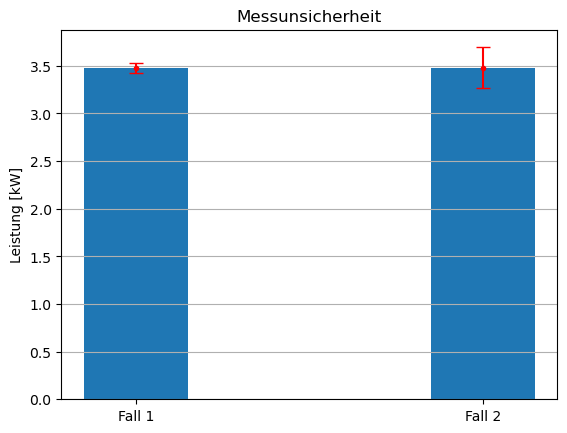

Fall 1 : 3.48+/-0.05 [kW]
Fall 2 : 3.48+/-0.21 [kW]


In [16]:
fig, ax = plt.subplots()

x = ['Fall 1', 'Fall 2']
y = [np.round(Q_dot*10**(-3), 2), np.round(Q_dot*10**(-3), 2)] 

ax.bar(x, y, width=0.3)
ax.set_ylabel('Leistung [kW]')
ax.set_title('Messunsicherheit')
ax.yaxis.grid(True)

error = [Q_dot_err_1.std_dev*10**(-3), Q_dot_err_2.std_dev*10**(-3)]

plt.errorbar(x, y, yerr=error, fmt='.', color='red', ecolor='red', alpha=1, capsize=5)

plt.show()

print('Fall 1 :', Fall_1, '[kW]')
print('Fall 2 :', Fall_2, '[kW]')

# SENSITIVITÄTSANALYSE

# Methode 1 $\longrightarrow$ SensitivityAnalyzer
https://nickderobertis.github.io/sensitivity/auto_examples/sensitivity_analysis.html

In [17]:
from sensitivity import SensitivityAnalyzer

## Modellgleichung und Eingangsvariablen definieren

untere Grenze $\longrightarrow$ Werte von Fall 1  
obere Grenze $\longrightarrow$ Werte von Fall 2

Anmerkung: $c_{p_1} = c_{p_2}$

In [18]:
def my_model(m_dot, t_ein, t_aus):
    
    return m_dot * c_p_1 * (t_ein - t_aus)

sensitivity_dict = {
    'm_dot': [m_dot_1, m_dot_2], # [Fall 1, Fall 2] in kg/h
    't_ein': [t_ein_1, t_ein_2], # [Fall 1, Fall 2] in °C
    't_aus': [t_aus_1, t_aus_2] # [Fall 1, Fall 2] in °C
}

sa = SensitivityAnalyzer(sensitivity_dict, my_model)

100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1113.21it/s]


## Variation der Eingangsvariablen (Index i: 0...7)

m_dot_i in kg/s
<br>
t_ein_i und t_aus_i in °C
<br>
$c_p$ bleibt konstant und wird nicht variiert
<br>
Result = Q_dot_i in W

Anmerkung: Q_dot_0 bzw. Q_dot_7 $\longrightarrow$ Eingangsgrößen von Fall 1 und Fall 2 (= gleicher Wert)

In [19]:
sa.df.style.background_gradient(subset='Result', cmap='RdYlGn_r')

,m_dot,t_ein,t_aus,Result
0,0.083333,50,40,3484.166667
1,0.083333,50,44,2090.500000
2,0.083333,46,40,2090.500000
3,0.083333,46,44,696.833333
4,0.416667,50,40,17420.833333
5,0.416667,50,44,10452.500000
6,0.416667,46,40,10452.500000
7,0.416667,46,44,3484.166667


# Vergleich der einzelnen Eingangsvariablen miteinander

(1) m_dot und t_ein
<br>
(2) m_dot und t_aus
<br>
(3) t_ein und t_aus

Rot $\longrightarrow$ großer Einfluss
<br>
Grün $\longrightarrow$ kleiner Einfluss

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 998.32it/s]


,46,50
m_dot,,
0.083333,1393.67,2787.33
0.416667,6968.33,13936.67


,40,44
m_dot,,
0.083333,2787.33,1393.67
0.416667,13936.67,6968.33


,40,44
t_ein,,
46,6271.50,2090.50
50,10452.50,6271.50


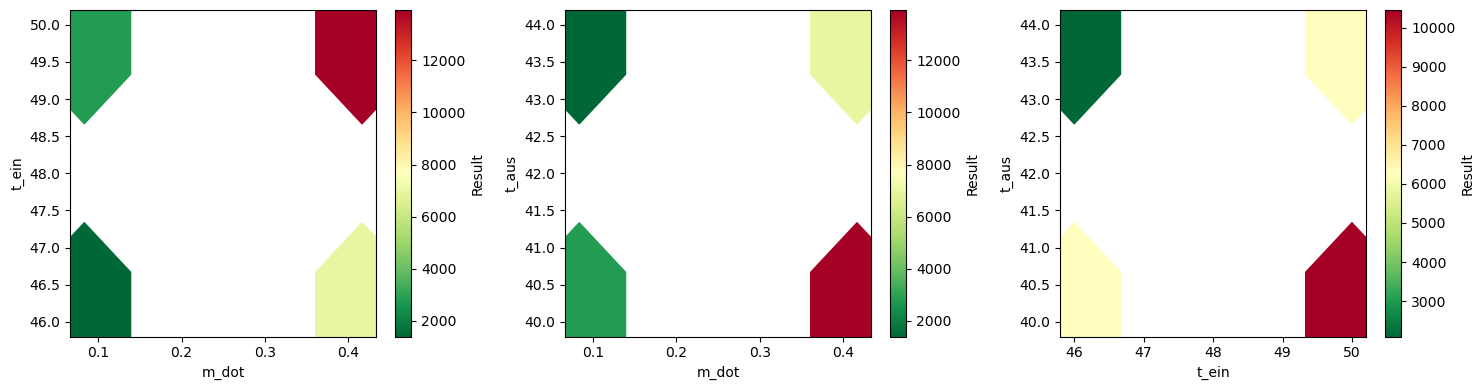

In [20]:
def Q_dot(m_dot, t_ein, t_aus):
    return m_dot * c_p_1 * (t_ein - t_aus)

sensitivity_dict = {
    'm_dot': [m_dot_1, m_dot_2], # [Fall 1, Fall 2] in kg/s
    't_ein': [t_ein_1, t_ein_2], # [Fall 1, Fall 2] in °C
    't_aus': [t_aus_1, t_aus_2] # [Fall 1, Fall 2] in °C
}

sa = SensitivityAnalyzer(sensitivity_dict, Q_dot, grid_size=3, reverse_colors=True)

plot = sa.plot()

styled_dict = sa.styled_dfs(num_fmt='{:.2f}')

# Methode 2  $\longrightarrow$ SALib
https://salib.readthedocs.io/en/latest/index.html

https://www.youtube.com/watch?v=gkR_lz5OptU&ab_channel=PyData

In [21]:
import SALib
import pandas as pd

from SALib.sample import morris as sample_morris
from SALib.analyze import morris as analyze_morris
from SALib.plotting.morris import horizontal_bar_plot

In [22]:
# Fall 1
t_ein_1 = 50 #[°C]
t_aus_1 = 40 #[°C]
m_dot_1 = 300/3600 #[kg/s]

# Fall 2
t_ein_2 = 46 #[°C]
t_aus_2 = 44 #[°C]
m_dot_2 = 1500/3600 #[kg/s]

c_p = 4.181*10**3 #[J/(kg*K)]


# Eingangvariablen mit oberer und unterer Grenze
parametric_dict = {
    'num_vars': 3,
    'names': ['t_ein', 't_aus', 'm_dot'],
    'bounds': [[t_ein_2, t_ein_1],
               [t_aus_1, t_aus_2],
               [m_dot_1, m_dot_2]]
}

# ??? Generate samples using Morris method ???
num_trajectories = 100
num_levels = 4
model_input = sample_morris.sample(parametric_dict, num_trajectories, num_levels)

def model(params):
    t_ein, t_aus, m_dot = params
    # Modell implementieren
    result = m_dot * c_p * (t_ein - t_aus)
    return result

model_output = np.array([model(params) for params in model_input])

# ??? Perform Morris analysis ???
Si = analyze_morris.analyze(parametric_dict, model_input, model_output) # , print_to_console=True)

# Print the Morris sensitivity indices
#print("mu:", Si['mu'])
#print("sigma:", Si['sigma'])
#print("mu_star:", Si['mu_star'])
#print("mu_star_conf:", Si['mu_star_conf'])

print()

# DataFrame mit griechischen Buchstaben
df_results = pd.DataFrame({
    'Parameter': parametric_dict['names'],
    'μ': Si['mu'],
    'σ': Si['sigma'],
    'μ*': Si['mu_star'],
    '95% CI': Si['mu_star_conf']
})

print(df_results)


  Parameter            μ            σ           μ*      95% CI
0     t_ein  4106.671111  2086.685182  4106.671111  372.457000
1     t_aus -4143.835556  2070.913596  4143.835556  416.330330
2     m_dot  8622.151111  3213.329417  8622.151111  627.184257


## Parameter $\mu$, $\sigma$, $\mu ^\ast$ und 95% CI $\longrightarrow$ Bedeutung 
### Hier sind grundlegende Erklärungen für die Sensitivitätsindizes:

(1) $\sigma$ (Sigma - Total Sensitivity Index):
<br>
$\bullet$ Beschreibt die Gesamtvarianz der Modellausgabe, die durch eine bestimmte Eingangsvariable verursacht wird.
<br>
$\bullet$ Hohe Werte von $\sigma$ deuten darauf hin, dass die Eingangsvariable einen erheblichen Einfluss auf die Modellausgabe hat.

(2) $\mu$ (Elementary Effect):
<br>
$\bullet$ Der durchschnittliche Beitrag einer einzelnen Eingangsvariable zur Varianz der Modellausgabe.
<br>
$\bullet$ Gibt an, wie stark die Modellantwort auf kleine Änderungen der Eingangsvariable reagiert.
<br>
$\bullet$ Niedrige $\mu$-Werte zeigen an, dass die Eingangsvariable einen geringen Einfluss hat.

(3) $\mu ^\ast$ (Normalized Elementary Effect):
<br>
$\bullet$ Der durchschnittliche Beitrag einer einzelnen Eingangsvariable zur Varianz der Modellausgabe, normiert auf die Gesamtvarianz ($\sigma$).
<br>
$\bullet$ Gibt den prozentualen Anteil der Varianz an, der auf die jeweilige Eingangsvariable zurückzuführen ist.
<br>
$\bullet$ Niedrige $\mu ^\ast$-Werte zeigen an, dass die Eingangsvariable einen geringen relativen Beitrag hat.

(4) 95% Confidence Interval (CI) für $\mu ^\ast$:
<br>
$\bullet$ Gibt den Bereich an, in dem der wahre Wert des $\mu ^\ast$-Parameters mit 95% Wahrscheinlichkeit liegt.
<br>
$\bullet$ Ein schmaleres Intervall deutet auf eine genauere Schätzung hin.

#### In der Regel sollte darauf geachtet werden, wie groß die einzelnen Effekte ($\mu$) im Vergleich zur Gesamtvarianz ($\sigma$) sind. Ein hoher $\mu ^\ast$-Wert einer Eingangsvariable deutet darauf hin, dass diese Variable einen signifikanten relativen Beitrag zur Unsicherheit der Modellausgabe leistet.

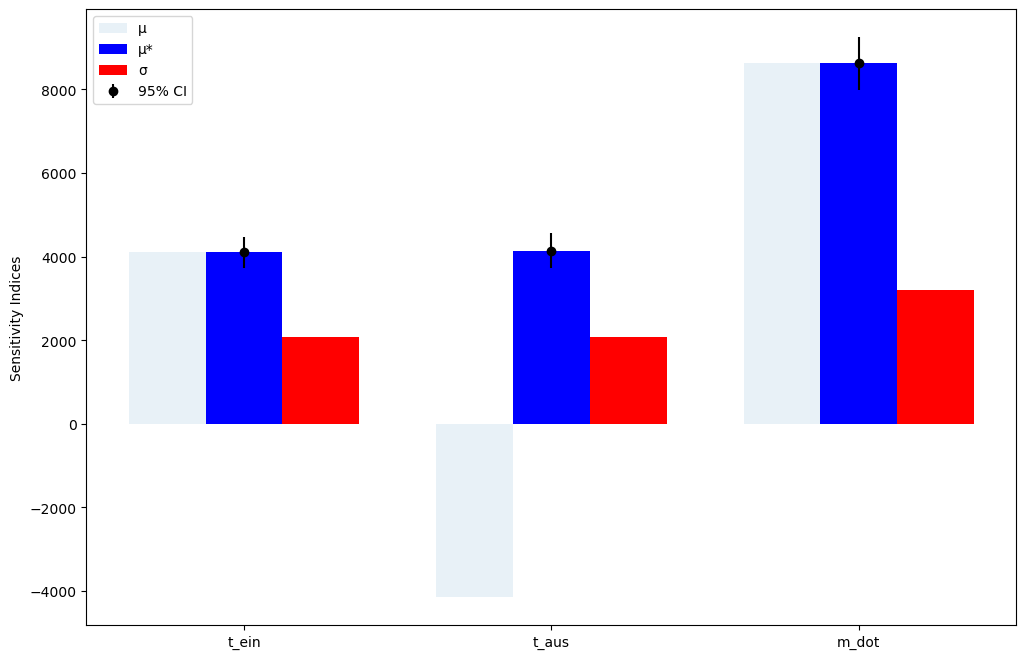

In [23]:
# Plotting all sensitivity indices and confidence intervals
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.25

# Extracting and plotting mu
sobol_indices_mu = Si['mu']
ax.bar(np.arange(len(sobol_indices_mu)) - width, sobol_indices_mu, label='μ', alpha=0.1, width=width)

# Extracting and plotting mu_star
sobol_indices_mu_star = Si['mu_star']
ax.bar(np.arange(len(sobol_indices_mu_star)), sobol_indices_mu_star, label='μ*', color='blue', width=width)

# Extracting and plotting sigma
sobol_indices_sigma = Si['sigma']
ax.bar(np.arange(len(sobol_indices_sigma)) + width, sobol_indices_sigma, label='σ', color='red', width=width, alpha=1)

# Extracting and plotting mu_star_conf
sobol_indices_mu_star_conf = Si['mu_star_conf']
ax.errorbar(
    np.arange(len(sobol_indices_mu_star_conf)),
    sobol_indices_mu_star,
    yerr=sobol_indices_mu_star_conf,
    fmt='o',
    color='black',
    label='95% CI',
    alpha=1
)

ax.set_xticks(np.arange(len(parametric_dict['names'])))
ax.set_xticklabels(parametric_dict['names'])
ax.set_ylabel('Sensitivity Indices')
ax.legend(loc='upper left')

plt.show()

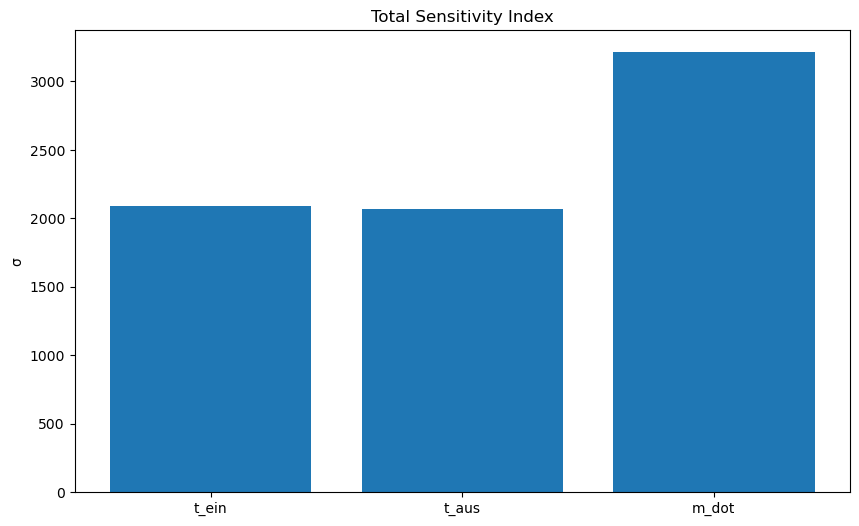

In [24]:
sobol_indices = Si['sigma']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(sobol_indices)), sobol_indices)
ax.set_xticks(range(len(sobol_indices)))
ax.set_xticklabels(parametric_dict['names'])
ax.set_ylabel('σ')
plt.title('Total Sensitivity Index')

plt.show()

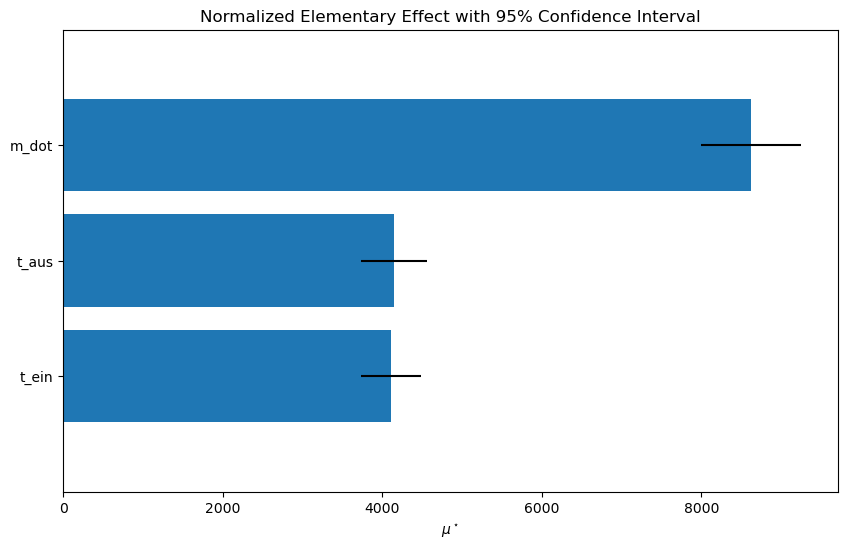

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
horizontal_bar_plot(ax, Si)
plt.title('Normalized Elementary Effect with 95% Confidence Interval')

plt.show()